In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# U-Net Original Research Paper
### Paper Name: U-Net: Convolutional Networks for Biomedical Image Segmentation
### Paper Link: https://arxiv.org/pdf/1505.04597.pdf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Configs

In [ ]:
class ROOTDIR:
    train = "/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/valid/images"
    train_mask = "/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/valid/masks"

# General Imports

In [ ]:
import os
import cv2
import zipfile
import numpy as np
import pandas as pd
from PIL import Image
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

# Extracting Files

dirs = ["../input/carvana-image-masking-challenge/train.zip",
        "../input/carvana-image-masking-challenge/train_masks.zip",
        "../input/carvana-image-masking-challenge/metadata.csv.zip"]

for i in tqdm(dirs):
    with zipfile.ZipFile(i) as z:
        z.extractall()
    

# Working with CSV

df = pd.read_csv("./metadata.csv")
df.head()

df.info()

# Working with Train Images and Masks

In [ ]:
from PIL import Image

In [ ]:

# #os.mkdir("masks")
# for imgname in os.listdir(ROOTDIR.train_mask):
#     img = Image.open('../input/leaf-disease-segmentation-dataset/data/data/masks/'+imgname) # open colour image
#     img = img.convert('L') # convert image to black and white
#     img.save('./masks/'+imgname)
#     '''img=cv2.imread('..\\input\\leaf-disease-segmentation-dataset\\data\\data\\masks'+imgname)
#     print(type(img))
#     img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#     img=cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
#     cv2.imwrite(imgname, img)'''

In [ ]:
# ROOTDIR.train_mask="./masks"

In [ ]:
train_img_lst = os.listdir(ROOTDIR.train) # "./train"
train_mask_lst = os.listdir(ROOTDIR.train_mask) # "./train_masks"

In [ ]:
print(train_mask_lst[:5])
print(train_img_lst[:5])

['319_jpg.rf.38584e160777eca15e46619d02249d3b.jpg', '20_jpg.rf.2b5984d7fa4feb59f55748b205ae52e8.jpg', '162_jpg.rf.749cb6c74d03699dfd8f919c6f29796c.jpg', '138_jpg.rf.e5924c63d44224f9f5f3d3404fd70506.jpg', '292_jpg.rf.92cedae2e5fb4cc13ff1d82e6de2bf3b.jpg']
['192_jpg.rf.b78e696c097b03b6e091b8c50caf22ce.jpg', '370_jpg.rf.e87e16605c01b614863114f570d6c880.jpg', '233_jpg.rf.f32cf6b4e0986daca13f6b2585700ad1.jpg', '254_jpg.rf.1381bc4d23fd7c25219d0eabf6304500.jpg', '17_jpg.rf.397608c7d50eb17bfb4b5ef7a48e9559.jpg']


In [ ]:
print(len(train_mask_lst))
print(len(train_img_lst))

91
92


#### Sorting to make sure we get right image and right mask

In [ ]:
sorted_train_mask_lst = sorted(train_mask_lst)

In [ ]:
sorted_train_img_lst = sorted(train_img_lst)

In [ ]:
print(sorted_train_mask_lst[:16])
print(sorted_train_img_lst[:16])

['109_jpg.rf.c17ee78bbc9b0b8ce90e20a1e7f265d0.jpg', '112_jpg.rf.028be6678096e75cc0efdfb050f9b725.jpg', '113_jpg.rf.d6a5b6ebec6accad9b5ed52ae1e73c07.jpg', '121_jpg.rf.b8eaf6d7c2ecdf13056e5e983f8c56d4.jpg', '122_jpg.rf.0d8b81312c8169caf24853dea768c451.jpg', '123_jpg.rf.18f61de8a6817d590cb77b1e4bcbb2a1.jpg', '133_jpg.rf.0b52bd58d128c622678bb93fec844658.jpg', '134_jpg.rf.da51492a26172ec81efde0f31a57b518.jpg', '136_jpg.rf.d45055adf0250df9c9eac942eb7aa12b.jpg', '138_jpg.rf.e5924c63d44224f9f5f3d3404fd70506.jpg', '139_jpg.rf.9022d48953c472b164b0b4444a07514f.jpg', '143_jpg.rf.cbcd6a6ffcd8cebb3fd20d6877b436ff.jpg', '14_jpg.rf.4764546719efe479b39142b0949dba24.jpg', '150_jpg.rf.25d62d055baf520619d93ca46dffc92e.jpg', '151_jpg.rf.c5ee0631790fab6ed6a622cad6ff8768.jpg', '158_jpg.rf.96a30e30ba76d062d99bf70bf38c27ef.jpg']
['109_jpg.rf.c17ee78bbc9b0b8ce90e20a1e7f265d0.jpg', '112_jpg.rf.028be6678096e75cc0efdfb050f9b725.jpg', '113_jpg.rf.d6a5b6ebec6accad9b5ed52ae1e73c07.jpg', '121_jpg.rf.b8eaf6d7c2ecdf1305

# Visualizing Images with their Mask
### Making sure images and mask are paired correctly.

/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/valid/images/109_jpg.rf.c17ee78bbc9b0b8ce90e20a1e7f265d0.jpg
(640, 640)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


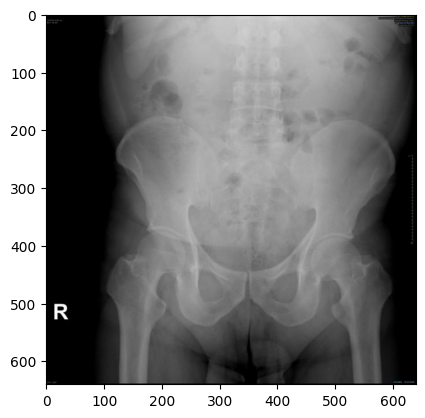

/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/valid/masks/109_jpg.rf.c17ee78bbc9b0b8ce90e20a1e7f265d0.jpg
(640, 640)


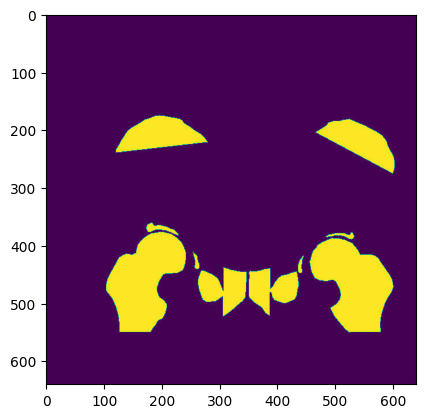

----------------------------------------------------
/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/valid/images/112_jpg.rf.028be6678096e75cc0efdfb050f9b725.jpg
(640, 640)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


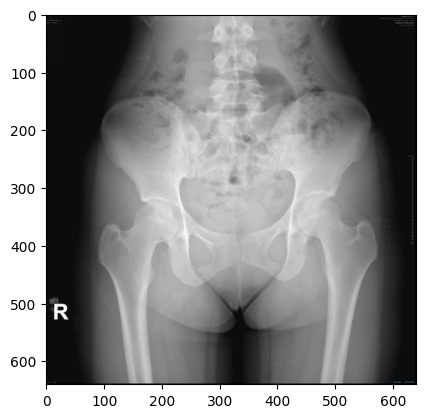

/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/valid/masks/112_jpg.rf.028be6678096e75cc0efdfb050f9b725.jpg
(640, 640)


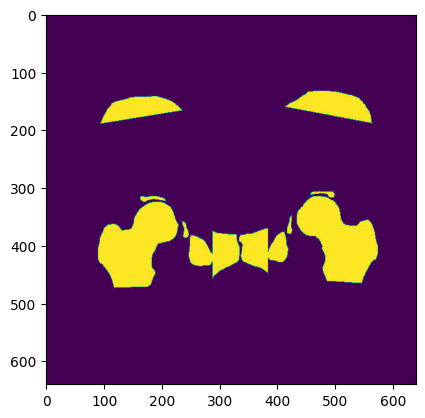

----------------------------------------------------


In [ ]:
def show_images(imgs_lst,masks_lst,loops=2):
    for i in range(loops):
        img_path = os.path.join(ROOTDIR.train,imgs_lst[i])
        mask_path = os.path.join(ROOTDIR.train_mask,masks_lst[i])
        img = Image.open(img_path)
        mask = Image.open(mask_path)
        print(img_path)
        print(img.size)
        print(type(img))
        plt.imshow(img)
        plt.show()
        print(mask_path)
        print(mask.size)
        plt.imshow(mask)
        plt.show()
        print("----------------------------------------------------")

show_images(sorted_train_img_lst, sorted_train_mask_lst)

# PyTorch Imports

In [ ]:
import torch
import torchvision
import torch.nn as nn
import albumentations as A
import torch.optim as optim
from torchvision import models
import torch.nn.functional as F
from torch.optim import lr_scheduler
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from albumentations.pytorch import ToTensorV2
from torch.utils.data import DataLoader, Dataset

# PyTorch Configuration

In [ ]:
class CFG:
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    split_pct = 0.2
    learning_rate = 3e-4
    batch_size = 4
    epochs = 30

In [ ]:
seed = 123
np.random.seed(seed)
torch.manual_seed(seed)

In [ ]:
CFG.device

device(type='cuda')

# Working with data

### Shuffling the data.

In [ ]:
#permuted_train_img_lst = np.random.permutation(np.array(sorted_train_img_lst))
#permuted_train_mask_lst = [x.replace(".jpg", "_mask.gif") for x in permuted_train_img_lst]
print(sorted_train_img_lst[:5])
print(sorted_train_mask_lst[:5])

['109_jpg.rf.c17ee78bbc9b0b8ce90e20a1e7f265d0.jpg', '112_jpg.rf.028be6678096e75cc0efdfb050f9b725.jpg', '113_jpg.rf.d6a5b6ebec6accad9b5ed52ae1e73c07.jpg', '121_jpg.rf.b8eaf6d7c2ecdf13056e5e983f8c56d4.jpg', '122_jpg.rf.0d8b81312c8169caf24853dea768c451.jpg']
['109_jpg.rf.c17ee78bbc9b0b8ce90e20a1e7f265d0.jpg', '112_jpg.rf.028be6678096e75cc0efdfb050f9b725.jpg', '113_jpg.rf.d6a5b6ebec6accad9b5ed52ae1e73c07.jpg', '121_jpg.rf.b8eaf6d7c2ecdf13056e5e983f8c56d4.jpg', '122_jpg.rf.0d8b81312c8169caf24853dea768c451.jpg']


/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/train/images/100_jpg.rf.2ce2ec7f69efe2e7ffb69eaa8ab95c60.jpg
(640, 640)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


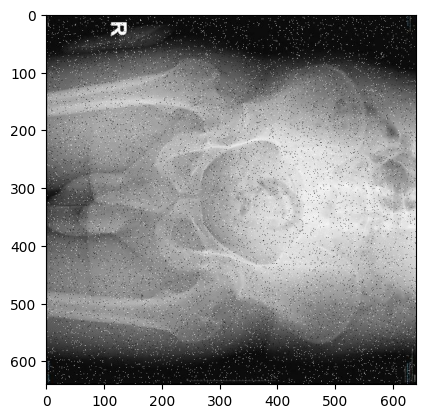

/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/train/masks/100_jpg.rf.2ce2ec7f69efe2e7ffb69eaa8ab95c60.jpg
(640, 640)


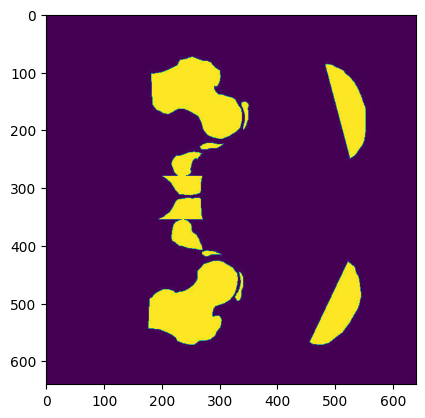

----------------------------------------------------
/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/train/images/100_jpg.rf.c53ccb45902a431c342bd29d5923f212.jpg
(640, 640)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


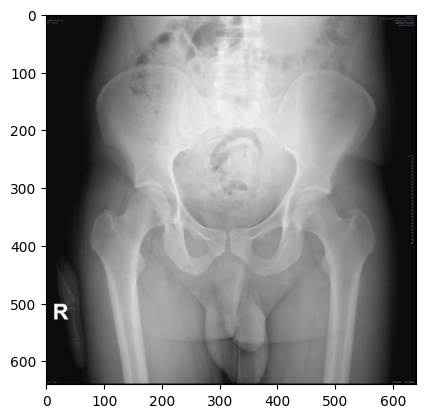

/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/train/masks/100_jpg.rf.c53ccb45902a431c342bd29d5923f212.jpg
(640, 640)


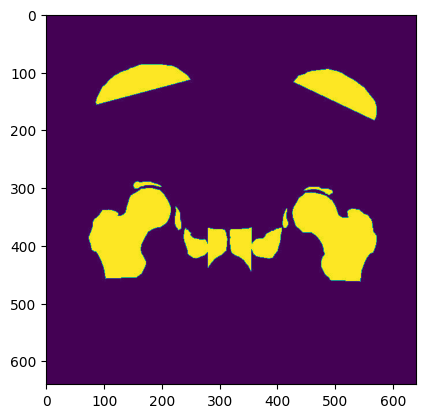

----------------------------------------------------


In [ ]:
show_images(sorted_train_img_lst,sorted_train_mask_lst)

### Splitting into Training and Validation

In [ ]:
length = len(sorted_train_img_lst)
print(length*0.2) # convert this to int

18.400000000000002


In [ ]:
train_images_list = sorted_train_img_lst[int(CFG.split_pct*len(sorted_train_img_lst)) :]
train_masks_list = sorted_train_mask_lst[int(CFG.split_pct*len(sorted_train_mask_lst)) :]
print(len(train_masks_list))

val_images_list = sorted_train_img_lst[: int(CFG.split_pct*len(sorted_train_img_lst))]
val_masks_list = sorted_train_mask_lst[: int(CFG.split_pct*len(sorted_train_mask_lst))]
print(len(val_masks_list))

# 4071+1017=5088 (split includes all items)

73
18


### Visualizing Train Dataset

/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/train/images/185_jpg.rf.52080b8a5cf168d7aea06d4637858305.jpg
(640, 640)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


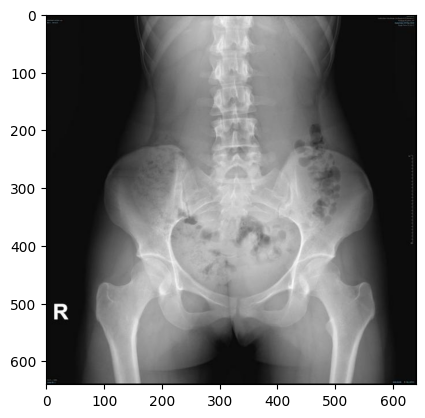

/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/train/masks/185_jpg.rf.52080b8a5cf168d7aea06d4637858305.jpg
(640, 640)


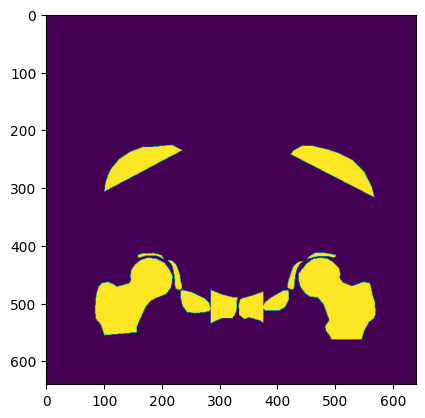

----------------------------------------------------
/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/train/images/185_jpg.rf.8120cae376e831f8716d62f5e2a8f7da.jpg
(640, 640)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


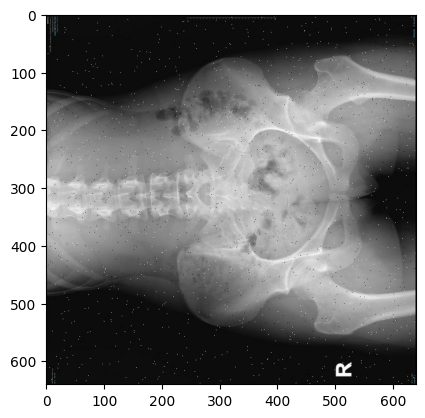

/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/train/masks/185_jpg.rf.8120cae376e831f8716d62f5e2a8f7da.jpg
(640, 640)


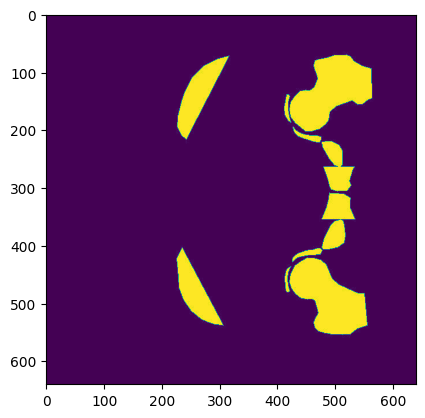

----------------------------------------------------


In [ ]:
show_images(train_images_list,train_masks_list)

### Visualizing Validation Dataset

/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/train/images/100_jpg.rf.2ce2ec7f69efe2e7ffb69eaa8ab95c60.jpg
(640, 640)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


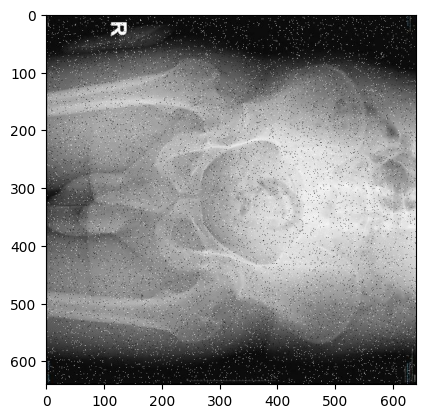

/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/train/masks/100_jpg.rf.2ce2ec7f69efe2e7ffb69eaa8ab95c60.jpg
(640, 640)


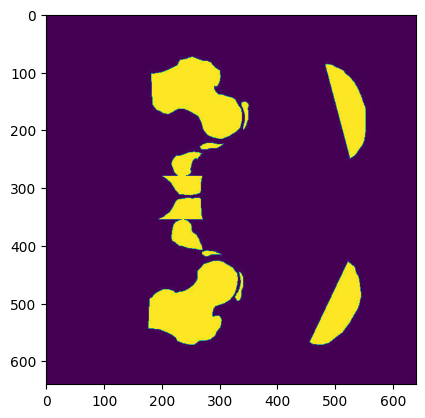

----------------------------------------------------
/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/train/images/100_jpg.rf.c53ccb45902a431c342bd29d5923f212.jpg
(640, 640)
<class 'PIL.JpegImagePlugin.JpegImageFile'>


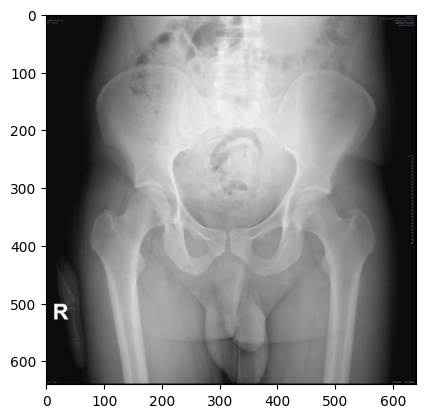

/content/drive/MyDrive/data/u-net/segmentation_dataset_unet/dataset/train/masks/100_jpg.rf.c53ccb45902a431c342bd29d5923f212.jpg
(640, 640)


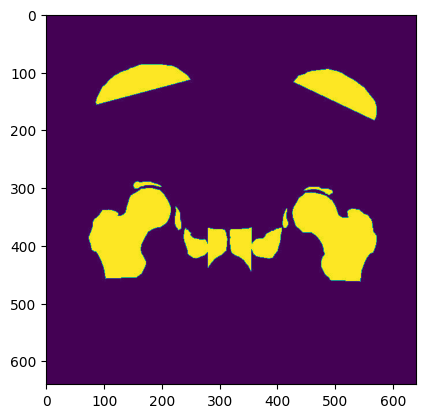

----------------------------------------------------


In [ ]:
show_images(val_images_list,val_masks_list)

# Dataset Class

In [ ]:
class CarvanaDataset(Dataset):
    def __init__(self,img_list,mask_list,transform=None):
        self.img_list = img_list
        self.mask_list = mask_list
        self.transform = transform

    def __len__(self):
        return len(self.img_list)

    def __getitem__(self,index):
        img_path = os.path.join(ROOTDIR.train,self.img_list[index])
        mask_path = os.path.join(ROOTDIR.train_mask,self.mask_list[index])
        img = Image.open(img_path)
        mask = Image.open(mask_path)
        img = np.array(img)
        mask = np.array(mask)
        mask[mask==255.0] = 1.0
        #img_mask_dict = {"image": img, "mask": mask}

        if self.transform:
            augmentation = self.transform(image=img, mask=mask)
            img = augmentation["image"]
            mask = augmentation["mask"]
            mask = torch.unsqueeze(mask,0)
            #transformations = self.transform(image=img, mask=mask)
            #img = transformations["image"]
            #mask = transformations["mask"]

        return img,mask

In [ ]:
train_transform = A.Compose([A.Resize(572,572),
                             A.Rotate(limit=15,p=0.1),
                             A.HorizontalFlip(p=0.5),
                             A.Normalize(mean=(0,0,0),std=(1,1,1),max_pixel_value=255),
                             ToTensorV2()])

val_transform = A.Compose([A.Resize(572,572),
                           A.Normalize(mean=(0,0,0),std=(1,1,1),max_pixel_value=255),
                           ToTensorV2()])

In [ ]:
train_dataset = CarvanaDataset(train_images_list, train_masks_list, transform = train_transform)
val_dataset = CarvanaDataset(val_images_list, val_masks_list, transform = train_transform)

In [ ]:
idx = 10
img,mask = train_dataset[idx]

In [ ]:
mask.shape

torch.Size([1, 572, 572])

In [ ]:
img.max()

tensor(1.)

In [ ]:
def show_single_img(img,mask,index=None,train=True):
    if index:
        if train:
            img,mask = train_dataset[index]
        else:
            img,mask = val_dataset[index]
    plt.imshow(img.permute(1,2,0),cmap="gray")  # Convert (3, 572, 572) -> (572, 572, 3)
    plt.show()
    plt.imshow(mask.permute(1,2,0), cmap="gray")  # Convert (1, 572, 572) -> (572, 572, 1)
    print(mask.shape)
    plt.show()


---------------Train---------------


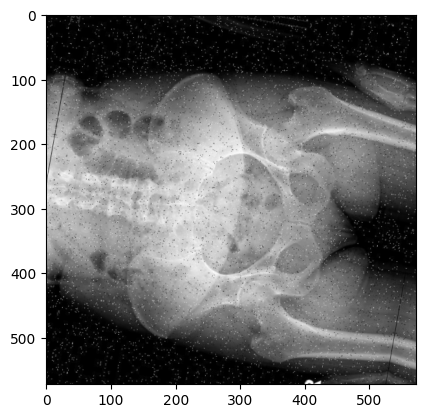

torch.Size([1, 572, 572])


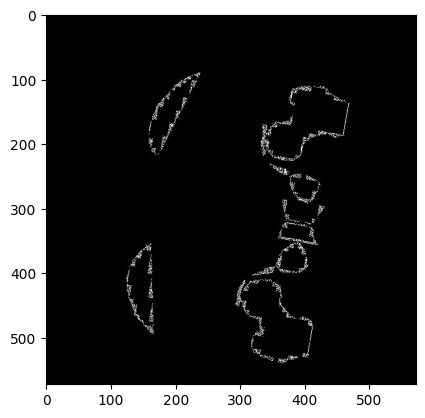

---------------Validation---------------


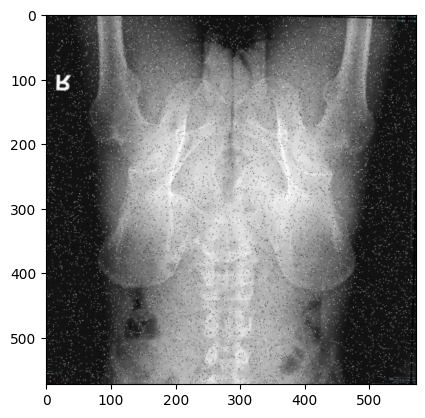

torch.Size([1, 572, 572])


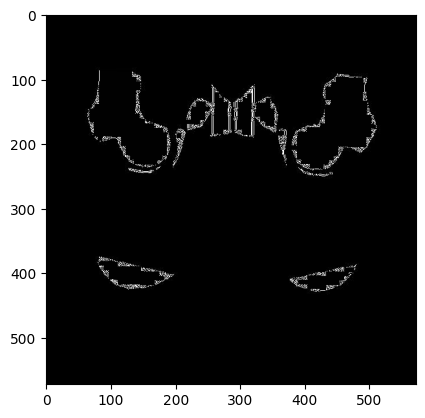

In [ ]:
print("---------------Train---------------")
show_single_img(img,mask,index=15,train=False)
print("---------------Validation---------------")
show_single_img(img,mask,index=15,train=True)

# Dataloader

In [ ]:
train_dataloader = DataLoader(train_dataset,batch_size=CFG.batch_size,shuffle=True)
val_dataloader = DataLoader(val_dataset,batch_size=CFG.batch_size,shuffle=False)

In [ ]:
a = iter(train_dataloader)
img,mask = a.__next__()
print(img.shape,mask.shape)

torch.Size([4, 3, 572, 572]) torch.Size([4, 1, 572, 572])


### Utility Functions

In [ ]:
def double_conv(in_ch, out_ch):
    conv = nn.Sequential(
        nn.Conv2d(in_channels=in_ch,out_channels=out_ch,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(out_ch),
        nn.ReLU(inplace=True),
        nn.Conv2d(in_channels=out_ch,out_channels=out_ch,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(out_ch),
        nn.ReLU(inplace=True)
    )

    return conv

#def cropper(og_tensor, target_tensor):
#    og_shape = og_tensor.shape[2]
#    target_shape = target_tensor.shape[2]
#    delta = (og_shape - target_shape) // 2
#    cropped_og_tensor = og_tensor[:,:,delta:og_shape-delta,delta:og_shape-delta]
#    return cropped_og_tensor


def padder(left_tensor, right_tensor):
    # left_tensor is the tensor on the encoder side of UNET
    # right_tensor is the tensor on the decoder side  of the UNET

    if left_tensor.shape != right_tensor.shape:
        padded = torch.zeros(left_tensor.shape)
        padded[:, :, :right_tensor.shape[2], :right_tensor.shape[3]] = right_tensor
        return padded.to(CFG.device)

    return right_tensor.to(CFG.device)


# UNET MODEL FROM SCRATCH

In [ ]:
class UNET(nn.Module):
    def __init__(self,in_chnls, n_classes):
        super(UNET,self).__init__()

        self.in_chnls = in_chnls
        self.n_classes = n_classes

        self.max_pool = nn.MaxPool2d(kernel_size=2,stride=2)

        self.down_conv_1 = double_conv(in_ch=self.in_chnls,out_ch=64)
        self.down_conv_2 = double_conv(in_ch=64,out_ch=128)
        self.down_conv_3 = double_conv(in_ch=128,out_ch=256)
        self.down_conv_4 = double_conv(in_ch=256,out_ch=512)
        self.down_conv_5 = double_conv(in_ch=512,out_ch=1024)
        #print(self.down_conv_1)

        self.up_conv_trans_1 = nn.ConvTranspose2d(in_channels=1024,out_channels=512,kernel_size=2,stride=2)
        self.up_conv_trans_2 = nn.ConvTranspose2d(in_channels=512,out_channels=256,kernel_size=2,stride=2)
        self.up_conv_trans_3 = nn.ConvTranspose2d(in_channels=256,out_channels=128,kernel_size=2,stride=2)
        self.up_conv_trans_4 = nn.ConvTranspose2d(in_channels=128,out_channels=64,kernel_size=2,stride=2)

        self.up_conv_1 = double_conv(in_ch=1024,out_ch=512)
        self.up_conv_2 = double_conv(in_ch=512,out_ch=256)
        self.up_conv_3 = double_conv(in_ch=256,out_ch=128)
        self.up_conv_4 = double_conv(in_ch=128,out_ch=64)

        self.conv_1x1 = nn.Conv2d(in_channels=64,out_channels=self.n_classes,kernel_size=1,stride=1)

    def forward(self,x):

        # encoding
        x1 = self.down_conv_1(x)
        #print("X1", x1.shape)
        p1 = self.max_pool(x1)
        #print("p1", p1.shape)
        x2 = self.down_conv_2(p1)
        #print("X2", x2.shape)
        p2 = self.max_pool(x2)
        #print("p2", p2.shape)
        x3 = self.down_conv_3(p2)
        #print("X2", x3.shape)
        p3 = self.max_pool(x3)
        #print("p3", p3.shape)
        x4 = self.down_conv_4(p3)
        #print("X4", x4.shape)
        p4 = self.max_pool(x4)
        #print("p4", p4.shape)
        x5 = self.down_conv_5(p4)
        #print("X5", x5.shape)

        # decoding
        d1 = self.up_conv_trans_1(x5)  # up transpose convolution ("up sampling" as called in UNET paper)
        pad1 = padder(x4,d1) # padding d1 to match x4 shape
        cat1 = torch.cat([x4,pad1],dim=1) # concatenating padded d1 and x4 on channel dimension(dim 1) [batch(dim 0),channel(dim 1),height(dim 2),width(dim 3)]
        uc1 = self.up_conv_1(cat1) # 1st up double convolution

        d2 = self.up_conv_trans_2(uc1)
        pad2 = padder(x3,d2)
        cat2 = torch.cat([x3,pad2],dim=1)
        uc2 = self.up_conv_2(cat2)

        d3 = self.up_conv_trans_3(uc2)
        pad3 = padder(x2,d3)
        cat3 = torch.cat([x2,pad3],dim=1)
        uc3 = self.up_conv_3(cat3)

        d4 = self.up_conv_trans_4(uc3)
        pad4 = padder(x1,d4)
        cat4 = torch.cat([x1,pad4],dim=1)
        uc4 = self.up_conv_4(cat4)

        conv_1x1 = self.conv_1x1(uc4)
        return conv_1x1
        #print(conv_1x1.shape)

# Training and Validation

### Train Function


In [ ]:
def train_model(model,dataloader,criterion,optimizer):
    model.train()
    train_running_loss = 0.0
    for j,img_mask in enumerate(tqdm(dataloader)):
        img = img_mask[0].float().to(CFG.device)
        #print(" ----- IMAGE -----")
        #print(img)
        mask = img_mask[1].float().to(CFG.device)
        #print(" ----- MASK -----")
        #print(mask)

        y_pred = model(img)
        #print(" ----- Y PRED -----")
        #print(y_pred)
        #print(" ----- Y PRED SHAPE -----")#
        #print(y_pred.shape)
        optimizer.zero_grad()

        loss = criterion(y_pred,mask)

        train_running_loss += loss.item() * CFG.batch_size

        loss.backward()
        optimizer.step()

    train_loss = train_running_loss / (j+1)
    return train_loss

### Validation Function

In [ ]:
def val_model(model,dataloader,criterion,optimizer):
    model.eval()
    val_running_loss = 0
    with torch.no_grad():
        for j,img_mask in enumerate(tqdm(dataloader)):
            img = img_mask[0].float().to(CFG.device)
            mask = img_mask[1].float().to(CFG.device)
            y_pred = model(img)
            loss = criterion(y_pred,mask)

            val_running_loss += loss.item() * CFG.batch_size

        val_loss = val_running_loss / (j+1)
    return val_loss

In [ ]:
model = UNET(in_chnls = 3, n_classes = 6).to(CFG.device)
optimizer = optim.Adam(model.parameters(), lr = CFG.learning_rate)
criterion = nn.BCEWithLogitsLoss()
train_loss_lst = []
val_loss_lst = []

### Train and Validation Loop

In [1]:
for i in tqdm(range(CFG.epochs)):
    train_loss = train_model(model=model,dataloader=train_dataloader,criterion=criterion,optimizer=optimizer)
    val_loss = val_model(model=model,dataloader=val_dataloader,criterion=criterion,optimizer=optimizer)
    train_loss_lst.append(train_loss)
    val_loss_lst.append(val_loss)
    print(f" Train Loss : {train_loss:.4f}")
    print(f" Validation Loss : {val_loss:.4f}")

### Training and Validation Loss Plot

In [ ]:
plt.plot(train_loss_lst, color="green", label='train loss')
plt.plot(val_loss_lst, color="red", label='validation loss')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# Saving Model

In [ ]:
TRAINED_FILE = "./unet_scratch.pth"

In [ ]:
torch.save(model.state_dict(), TRAINED_FILE)

In [ ]:
from IPython.display import FileLink
FileLink(TRAINED_FILE)

# Testing

In [ ]:
trained_model = UNET(in_chnls = 3, n_classes = 1)

In [ ]:
#UNET_TRAINED = "../input/unet-4-epoch-trained/unet_scratch.pth"
UNET_TRAINED = "../input/leafdisease-unet-model/unet_scratch.pth"

In [ ]:
trained_model.load_state_dict(torch.load(UNET_TRAINED))

In [ ]:
trained_model = trained_model.to("cuda")
trained_model.eval()


In [ ]:
#img_path = "../input/carvana-image-masking-challenge/29bb3ece3180_11.jpg"
img_path = "../input/leaf-disease-segmentation-dataset/data/data/images/00028.jpg"
img = cv2.imread(img_path)

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
test_transform = A.Compose([A.Resize(572,572),
                           A.Normalize(mean=(0,0,0),std=(1,1,1),max_pixel_value=255),
                           ToTensorV2()])

In [ ]:
test_image = test_transform(image = img)

print(test_image)

print(test_image["image"].dtype)
print(test_image["image"].shape)

img = test_image["image"].unsqueeze(0)
print(img.shape)

img = img.to("cuda")

In [ ]:
pred = trained_model(img)
pred.shape

In [ ]:
mask = pred.squeeze(0).cpu().detach().numpy()
print(mask.shape)
mask = mask.transpose(1,2,0)
print(mask.shape)

In [ ]:
display_test_img = test_image["image"].cpu().detach().numpy()
print(display_test_img.shape)
display_test_img = display_test_img.transpose(1,2,0)
display_test_img.shape

In [ ]:
mask[mask < 0]=0
mask[mask > 0]=1

In [ ]:
print("-------Original Image-------")
plt.imshow(display_test_img, cmap="gray")
plt.show()
print("-------Image Mask-------")
plt.imshow(mask,cmap="gray")
plt.show()

# **webapp using streamlit**

In [ ]:
!pip install streamlit
!pip install pyngrok===4.1.1
from pyngrok import ngrok

In [ ]:
%%writefile frontend.py

import streamlit as st


def detect(img_path):
    img = cv2.imread(img_path)
    test_transform = A.Compose([A.Resize(572,572), A.Normalize(mean=(0,0,0),std=(1,1,1),max_pixel_value=255), ToTensorV2()])
    test_image = test_transform(image = img)
    img = test_image["image"].unsqueeze(0)
    img = img.to("cuda")
    pred = trained_model(img)
    mask = pred.squeeze(0).cpu().detach().numpy()
    mask = mask.transpose(1,2,0)
    mask[mask < 0]=0
    mask[mask > 0]=1
    cv2.imwrite(mask, "result.jpg")
    return True

trained_model = UNET(in_chnls = 3, n_classes = 1)
UNET_TRAINED = "../input/leafdisease-unet-model/unet_scratch.pth"
trained_model.load_state_dict(torch.load(UNET_TRAINED))
#model = pkl.load(open("../input/leafdisease-unet-model/unet_scratch.pth", "rb"))

st.title("LEAF DISEASE DETECTION")
st.subheader("Leaf disease detection is used to detect the area of leaf in the image that is being infected")

st.markdown("**************")
st.title("Identify Disease")
imagefile = st.file_uploader("select an image containing any type of leaf", type=(["jpg", "png", "jpeg"]))
if imagefile is not None:
    from pathlib import Path
    path = Path(imagefile.name)
else:
    path = None
if st.button("Start Detection"):
    success = detect(path)
    if success:
        st.success("Image saved with detected disease")
    #st.image(imagefile, use_column_width=True, clamp=True)



In [ ]:
!nohup streamlit run frontend.py &
url = ngrok.connect(port='8501')
url